In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [2]:
def countScales(imgName):   
    img = cv2.imread(imgName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold using value calculated by Otsu's Binarization
    # source: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Remove noise
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations=2)

    # Label and count
    # source: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e
    count, labels = cv2.connectedComponents(opening)
    count = count - 1 # background doesn't count as a scale
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    
    plt.subplot(1, 2, 1), plt.imshow(gray, 'gray')
    plt.title(imgName[12:])
    plt.subplot(1, 2, 2), plt.imshow(labeled_img, 'gray')
    # Title shows threshold value calculated using Otsu's
    plt.title(str(count) + ' scales (threshold ' + str(ret) + ')')
    plt.show()
    
    return count

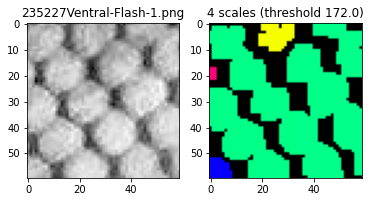

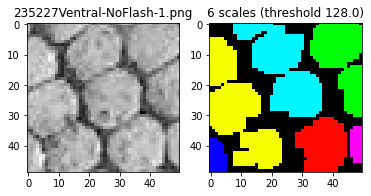

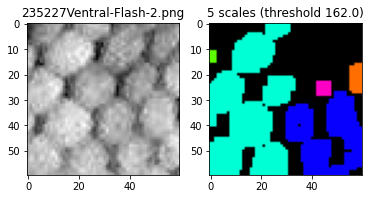

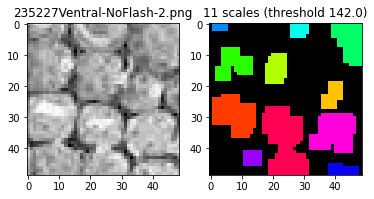

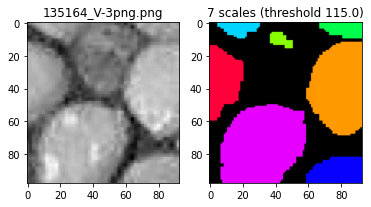

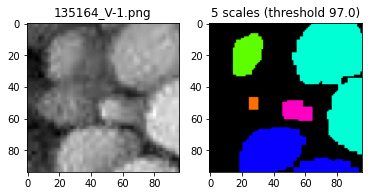

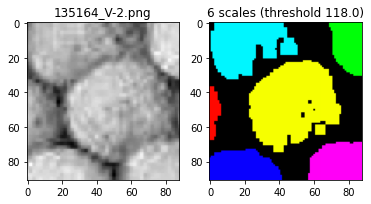

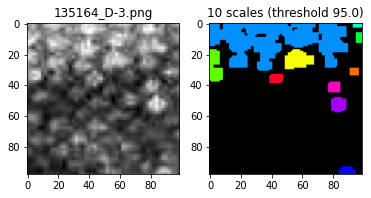

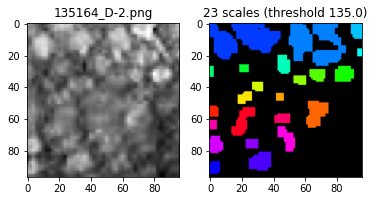

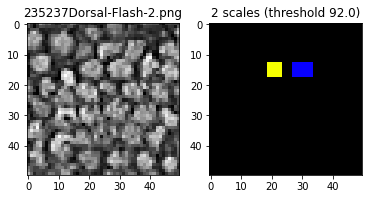

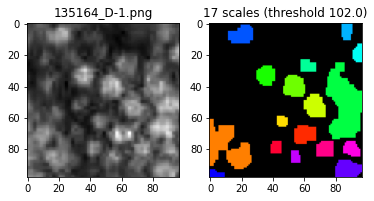

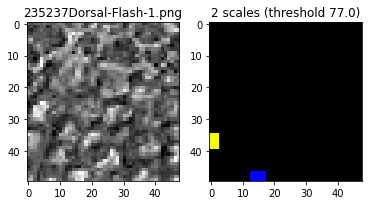

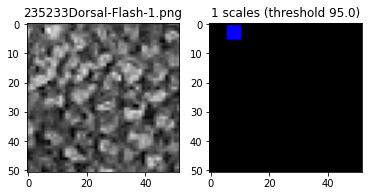

In [3]:
#create an iterator object for img directory
directory = os.scandir('More_images')

for img in directory:
    countScales('More_images/' + img.name)

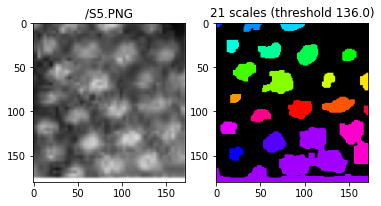

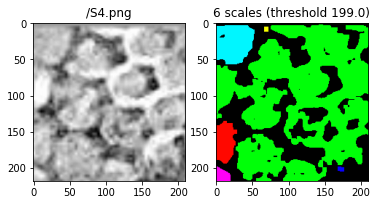

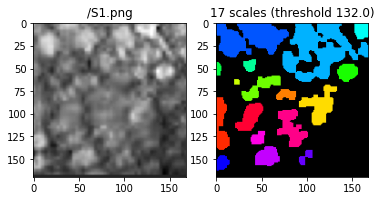

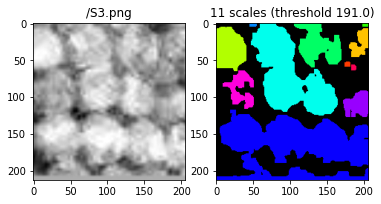

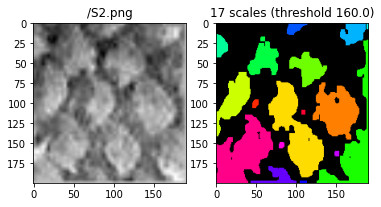

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-gi6lxw0x/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [4]:
directory = os.scandir('Scale_images')

for img in directory:
    countScales('Scale_images/' + img.name)